Paso 1: Crear una sesión de Spark
Primero, necesitamos crear una sesión de Spark para poder trabajar con PySpark.

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import split, regexp_replace, col, concat_ws, trim


# Crear una sesión de Spark
spark = SparkSession.builder.appName("PokemonDataCleaning").getOrCreate()


Paso 2: Cargar el archivo CSV
A continuación, cargamos el archivo CSV sin encabezado ya que este archivo tiene una estructura poco estandarizada.

In [0]:
# Cargar el archivo CSV sin encabezado
df = spark.read.format("csv").option("header", "true").csv("dbfs:/FileStore/pokemon/pokemon_go.csv")

# Mostrar algunos registros para ver la estructura original
df.display()


Pokemon,Max CP,Max HP,Attack,Defense,Stamina,Total Stats,Is Legendary,Type 1,Type 2
"""Slaking,""""4","431""""",233,290,166,284,740,False,normal,"none"""
"""Regigigas,""""4","346""""",184,287,210,221,718,True,normal,"none"""
"""Mewtwo,""""4","178""""",179,300,182,214,696,True,psychic,"none"""
"""Groudon,""""4","115""""",171,270,228,205,703,True,ground,"none"""
"""Kyogre,""""4","115""""",171,270,228,205,703,True,water,"none"""
"""Zekrom,""""4","038""""",171,275,211,205,691,True,dragon,"electric"""
"""Reshiram,""""4","038""""",171,275,211,205,691,True,dragon,"fire"""
"""Dialga,""""4","038""""",171,275,211,205,691,True,steel,"dragon"""
"""Palkia,""""3","991""""",159,280,215,189,684,True,water,"dragon"""
"""Arceus,""""3","989""""",197,238,238,237,713,True,normal,"none"""


Paso 3: Eliminar comillas dobles de cada columna
El CSV puede tener valores entre comillas dobles, por lo que vamos a eliminarlas en cada columna para evitar problemas al manipular los datos.

In [0]:
# Eliminar comillas dobles de cada columna
for column in df.columns:
    df = df.withColumn(column, regexp_replace(col(column), r'\"', ""))

df.display()



Pokemon,Max CP,Max HP,Attack,Defense,Stamina,Total Stats,Is Legendary,Type 1,Type 2
"Slaking,4",431,233,290,166,284,740,False,normal,none
"Regigigas,4",346,184,287,210,221,718,True,normal,none
"Mewtwo,4",178,179,300,182,214,696,True,psychic,none
"Groudon,4",115,171,270,228,205,703,True,ground,none
"Kyogre,4",115,171,270,228,205,703,True,water,none
"Zekrom,4",038,171,275,211,205,691,True,dragon,electric
"Reshiram,4",038,171,275,211,205,691,True,dragon,fire
"Dialga,4",038,171,275,211,205,691,True,steel,dragon
"Palkia,3",991,159,280,215,189,684,True,water,dragon
"Arceus,3",989,197,238,238,237,713,True,normal,none


Paso 4: Corregir las columnas desplazadas
Para solucionar el problema de los valores desplazados, verificamos si la columna split_columns tiene más de un elemento (por la coma adicional) y corregimos los valores de Pokemon y Max CP en consecuencia.

In [0]:
# Paso 4: Dividir los datos en columnas utilizando split
split_df = df.withColumn("split_columns", split(col("Pokemon"), r',(?=(?:[^\"]*\"[^\"]*\")*[^\"]*$)'))

split_df.display()

Pokemon,Max CP,Max HP,Attack,Defense,Stamina,Total Stats,Is Legendary,Type 1,Type 2,split_columns
"Slaking,4",431,233,290,166,284,740,False,normal,none,"List(Slaking, 4)"
"Regigigas,4",346,184,287,210,221,718,True,normal,none,"List(Regigigas, 4)"
"Mewtwo,4",178,179,300,182,214,696,True,psychic,none,"List(Mewtwo, 4)"
"Groudon,4",115,171,270,228,205,703,True,ground,none,"List(Groudon, 4)"
"Kyogre,4",115,171,270,228,205,703,True,water,none,"List(Kyogre, 4)"
"Zekrom,4",038,171,275,211,205,691,True,dragon,electric,"List(Zekrom, 4)"
"Reshiram,4",038,171,275,211,205,691,True,dragon,fire,"List(Reshiram, 4)"
"Dialga,4",038,171,275,211,205,691,True,steel,dragon,"List(Dialga, 4)"
"Palkia,3",991,159,280,215,189,684,True,water,dragon,"List(Palkia, 3)"
"Arceus,3",989,197,238,238,237,713,True,normal,none,"List(Arceus, 3)"


Paso 5: Corregir los valores desplazados

``split_columns``: Contiene el resultado de dividir el valor original ("Slaking,4").

``Primera withColumn (_c0)``: Se asegura de que la primera parte ("Slaking") esté en la columna correcta.

``Segunda withColumn (_c1)``: Concatenamos el valor desplazado ("4") con el valor existente en "_c1" para reconstruir el valor correcto.

In [0]:
# Paso 5: Corregir los valores desplazados
# Si hay más de un valor en la columna Pokemon, concatenamos esos valores correctamente
df_corrected = split_df.withColumn(
    "Pokemon",
    col("split_columns")[0]
).withColumn(
    "Max CP",
    concat_ws("", col("split_columns")[1], col("Max CP"))
)
df_final.display()

Pokemon,Max CP,Max HP,Attack,Defense,Stamina,Total Stats,Is Legendary,Type 1,Type 2
Slaking,4431,233,290,166,284,740,False,normal,none
Regigigas,4346,184,287,210,221,718,True,normal,none
Mewtwo,4178,179,300,182,214,696,True,psychic,none
Groudon,4115,171,270,228,205,703,True,ground,none
Kyogre,4115,171,270,228,205,703,True,water,none
Zekrom,4038,171,275,211,205,691,True,dragon,electric
Reshiram,4038,171,275,211,205,691,True,dragon,fire
Dialga,4038,171,275,211,205,691,True,steel,dragon
Palkia,3991,159,280,215,189,684,True,water,dragon
Arceus,3989,197,238,238,237,713,True,normal,none


Paso 6: Crear dataframe con posibles null


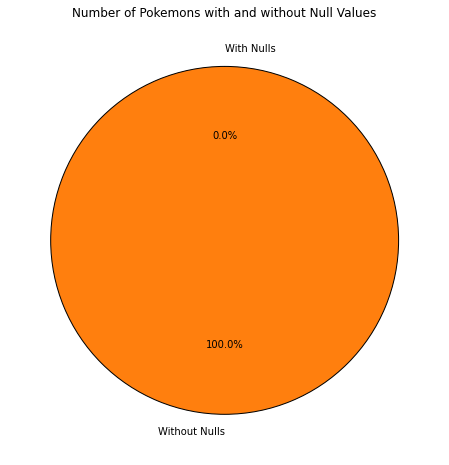

Pokemon,Max CP,Max HP,Attack,Defense,Stamina,Total Stats,Is Legendary,Type 1,Type 2


In [0]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# Crear una condición para filtrar filas que contienen al menos un valor nulo
null_condition = None
for column in df_final.columns:
    if null_condition is None:
        null_condition = col(column).isNull()
    else:
        null_condition |= col(column).isNull()

# Filtrar el DataFrame para obtener solo las filas con valores nulos
df_with_nulls = df_final.filter(null_condition)

# Contar las filas con y sin valores nulos
count_with_nulls = df_with_nulls.count()
count_without_nulls = df_final.count() - count_with_nulls

# Preparar los datos para el diagrama circular
labels = ["With Nulls", "Without Nulls"]
counts = [count_with_nulls, count_without_nulls]

# Crear el diagrama circular
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Number of Pokemons with and without Null Values")
plt.show()

# Mostrar los registros con valores nulos usando display
display(df_with_nulls)



Paso 7: Comprobacion de stats correctos

Comprobamos que la defensa el ataque y la stamina esten bien

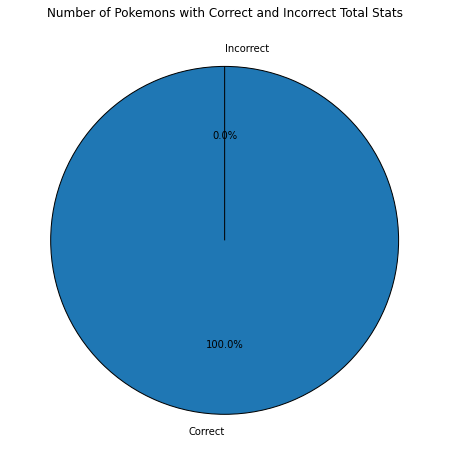

Pokemon,Max CP,Max HP,Attack,Defense,Stamina,Total Stats,Is Legendary,Type 1,Type 2,Calculated Total Stats,Is Correct
Slaking,4431,233,290,166,284,740,False,normal,none,740.0,true
Regigigas,4346,184,287,210,221,718,True,normal,none,718.0,true
Mewtwo,4178,179,300,182,214,696,True,psychic,none,696.0,true
Groudon,4115,171,270,228,205,703,True,ground,none,703.0,true
Kyogre,4115,171,270,228,205,703,True,water,none,703.0,true
Zekrom,4038,171,275,211,205,691,True,dragon,electric,691.0,true
Reshiram,4038,171,275,211,205,691,True,dragon,fire,691.0,true
Dialga,4038,171,275,211,205,691,True,steel,dragon,691.0,true
Palkia,3991,159,280,215,189,684,True,water,dragon,684.0,true
Arceus,3989,197,238,238,237,713,True,normal,none,713.0,true


In [0]:
# Importar funciones necesarias
from pyspark.sql.functions import col, expr
import matplotlib.pyplot as plt

# Crear una nueva columna que sume Attack, Defense y Stamina
df_with_sum = df_final.withColumn("Calculated Total Stats", col("Attack") + col("Defense") + col("Stamina"))

# Crear una condición para verificar si 'Calculated Total Stats' es igual a 'Total Stats'
df_checked = df_with_sum.withColumn("Is Correct", expr("`Calculated Total Stats` = `Total Stats`"))

# Contar el número de pokemons con los stats correctos e incorrectos
stats_count = df_checked.groupBy("Is Correct").count().collect()

# Preparar los datos para el diagrama circular
labels = ["Correct", "Incorrect"]
counts = [0, 0]
for row in stats_count:
    if row["Is Correct"]:
        counts[0] = row["count"]
    else:
        counts[1] = row["count"]

# Crear el diagrama circular
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Number of Pokemons with Correct and Incorrect Total Stats")
plt.show()

# Mostrar el DataFrame con el resultado de la verificación
display(df_checked)
